In [12]:
# import pandas as pd

# # Load the Excel file
# excel_file_path = "/kaggle/input/bank-transaction-data/bank.xlsx"  # Update with your file path
# csv_file_path = "/kaggle/working/bank.csv"  # Output CSV file path

# # Read the Excel file
# data = pd.read_excel(excel_file_path)

# # Save as CSV
# data.to_csv(csv_file_path, index=False)  # Save without the index column
# print(f"File converted and saved to {csv_file_path}")


File converted and saved to /kaggle/working/bank.csv


In [18]:
# import pandas as pd

# banking1 = pd.read_csv("/kaggle/input/bank-customer-segmentation/bank_transactions.csv")
# banking1.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [19]:
banking1.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in **accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.**

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

* Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
* Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
* Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [1]:
import pandas as pd 

banking = pd.read_csv("/kaggle/input/banking/account_data.csv")
banking.head()

,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,26450.90,CAD,5392.99,2018-08-16,2024-03-14
1,43907.72,CAD,50408.48,2019-04-03,2024-05-04
2,43576.50,USD,39557.73,2019-09-02,2024-11-22
3,61957.62,CAD,12515.15,2019-09-21,2024-04-30
4,94242.42,CHF,18783.13,2019-11-10,2024-04-28


In [2]:
banking["acct_cur"]

0      CAD
1      CAD
2      USD
3      CAD
4      CHF
      ... 
995    USD
996    AUD
997    EUR
998    EUR
999    CHF
Name: acct_cur, Length: 1000, dtype: object

In [3]:
# # Find values of acct_cur that are equal to 'euro'
# acct_eu = banking['acct_cur'] == 'EUR'

# # Convert acct_amount where it is in euro to dollars
# banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# # Unify acct_cur column by changing 'euro' values to 'dollar'
# banking.loc[acct_eu, 'acct_cur'] = 'USD'

# # Assert that only dollar currency remains
# assert all(banking['acct_cur'] == 'USD')  
# # "There are non-USD currencies in the dataset.

In [4]:
# Define exchange rates to convert to USD
exchange_rates = {
    'EUR': 1.1,  # 1 Euro = 1.1 USD
    'CAD': 0.75,  # 1 CAD = 0.75 USD
    'CHF': 1.1,  # 1 CHF = 1.1 USD
    'GBP': 1.25,  # 1 GBP = 1.25 USD
    'AUD': 0.65  # 1 AUD = 0.65 USD
}

# Convert account amounts to USD based on the currency
for currency, rate in exchange_rates.items():
    currency_filter = banking['acct_cur'] == currency
    banking.loc[currency_filter, 'acct_amount'] = banking.loc[currency_filter, 'acct_amount'] * rate
    banking.loc[currency_filter, 'acct_cur'] = 'USD'

# Assert that only USD remains
assert all(banking['acct_cur'] == 'USD'), "There are still non-USD currencies in the dataset."


In [5]:
banking["acct_cur"]

0      USD
1      USD
2      USD
3      USD
4      USD
      ... 
995    USD
996    USD
997    USD
998    USD
999    USD
Name: acct_cur, Length: 1000, dtype: object

# Uniform dates

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.


* Print the header of account_opened from the banking DataFrame and take a look at the different results.
* Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.
* Extract the year from the amended account_opened column and assign it to the acct_year column.
* Print the newly created acct_year column.



In [6]:
## Add new column to the banking df

import random
from datetime import datetime

# Define possible date formats
date_formats = ["%Y-%m-%d", "%d-%m-%y", "%B %d, %Y", "%y-%m-%d", "%m-%d-%y"]

# Generate the "acc_open" column with mixed formats
banking["acc_open"] = [
    datetime.strptime(date_str, "%Y-%m-%d").strftime(random.choice(date_formats))
    for date_str in banking["account_opened"]
]

# Save the updated DataFrame back to the CSV file
banking.to_csv("/kaggle/working/updated_banking.csv", index=False)

# Output confirmation
print("/kaggle/working/updated_banking.csv created successfully")


/kaggle/working/updated_banking.csv created successfully


In [7]:
banking2 = pd.read_csv("/kaggle/working/updated_banking.csv")
banking2.head()

,acct_amount,acct_cur,inv_amount,account_opened,last_transaction,acc_open
0,19838.175,USD,5392.99,2018-08-16,2024-03-14,"August 16, 2018"
1,32930.790,USD,50408.48,2019-04-03,2024-05-04,"April 03, 2019"
2,43576.500,USD,39557.73,2019-09-02,2024-11-22,19-09-02
3,46468.215,USD,12515.15,2019-09-21,2024-04-30,21-09-19
4,103666.662,USD,18783.13,2019-11-10,2024-04-28,11-10-19


In [8]:
# Print the header of account_opend
print(banking['acc_open'].head())

# Convert account_opened to datetime
banking['acc_open'] = pd.to_datetime(banking['acc_open'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['acc_open'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    August 16, 2018
1     April 03, 2019
2           19-09-02
3           21-09-19
4           11-10-19
Name: acc_open, dtype: object
0      2018
1      2019
2       NaN
3       NaN
4       NaN
       ... 
995     NaN
996     NaN
997     NaN
998     NaN
999     NaN
Name: acct_year, Length: 1000, dtype: object


<ipython-input-8-aee973ae287b>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banking['acc_open'] = pd.to_datetime(banking['acc_open'],


Cunning calendar cleaning! Now that the acct_year column is created, a simple .groupby() will show you how accounts are opened on a yearly!

# How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.


* Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.
* Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.



In [9]:
banking_updated = pd.read_csv("/kaggle/input/banking/banking_full_data.csv")
banking_updated.head()

,acct_amount,acct_cur,inv_amount,account_opened,last_transaction,acc_open,fund_A,fund_B,fund_C,fund_D,date_of_birth
0,34674.02,EUR,80845.74,2022-03-17,2024-11-09,22-03-17,2858.530000,4509.730000,3275.560000,3733.140000,1989-06-05
1,37583.48,EUR,4880.01,2015-12-13,2024-05-13,13-12-15,4605.750000,2227.240000,2967.480000,4653.440000,1996-05-23
2,55316.94,EUR,31207.78,2019-04-04,2024-07-06,2019-04-04,2991.780000,383.780000,3743.500000,1190.520000,1971-08-21
3,54657.94,GBP,47478.35,2015-11-14,2024-01-28,"November 14, 2015",1860.110000,4616.050000,2057.520000,1694.700000,1984-01-16
4,77307.40,CAD,56238.63,2023-04-18,2024-05-23,18-04-23,50159.231835,28342.499745,6642.717236,-28905.818816,1986-12-29


In [21]:
import random

# Add fund columns with random values (to simulate real data)
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']
for fund in fund_columns:
    banking[fund] = [round(random.uniform(0, 5000), 2) for _ in range(len(banking))]

# Ensure that some rows' fund sum equals `inv_amount` for realistic testing
for idx in range(len(banking)):
    if random.random() < 0.5:  # 50% chance to match exactly
        total_funds = banking.loc[idx, 'inv_amount']
        random_fund_distribution = [random.uniform(0, total_funds) for _ in range(3)]
        fund_values = random_fund_distribution + [total_funds - sum(random_fund_distribution)]
        banking.loc[idx, fund_columns] = fund_values


In [11]:
banking.head()

,acct_amount,acct_cur,inv_amount,account_opened,last_transaction,acc_open,acct_year
0,19838.175,USD,5392.99,2018-08-16,2024-03-14,2018-08-16,2018
1,32930.790,USD,50408.48,2019-04-03,2024-05-04,2019-04-03,2019
2,43576.500,USD,39557.73,2019-09-02,2024-11-22,NaT,NaN
3,46468.215,USD,12515.15,2019-09-21,2024-04-30,NaT,NaN
4,103666.662,USD,18783.13,2019-11-10,2024-04-28,NaT,NaN


In [22]:
# Your original code to check for consistency
inv_equ = banking_updated[fund_columns].sum(axis=1) == banking_updated["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking_updated[inv_equ]
inconsistent_inv = banking_updated[~inv_equ]

# Output the number of inconsistent investments
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])


Number of inconsistent investments:  599


In [16]:
import datetime as dt

# Convert 'date_of_birth' column to datetime
banking_updated['date_of_birth'] = pd.to_datetime(banking_updated['date_of_birth'])

# Store today's date and calculate ages
today = dt.date.today()

# Calculate ages
ages_manual = today.year - banking_updated['date_of_birth'].dt.year

# Adjust ages for those who haven't had their birthday yet this year
ages_manual -= (today.month < banking_updated['date_of_birth'].dt.month) | (
    (today.month == banking_updated['date_of_birth'].dt.month) & (today.day < banking_updated['date_of_birth'].dt.day)
)

# Add an "age_manual" column to the DataFrame
banking_updated['age_manual'] = ages_manual

# Output a few rows to check
print(banking_updated[['date_of_birth', 'age_manual']].head())


  date_of_birth  age_manual
0    1989-06-05          35
1    1996-05-23          28
2    1971-08-21          53
3    1984-01-16          41
4    1986-12-29          38


# Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

* Print the number of missing values by column in the banking DataFrame.
* Plot and show the missingness matrix of banking with the msno.matrix() function.
* Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.
*  Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.

acct_amount         0
acct_cur            0
inv_amount          0
account_opened      0
last_transaction    0
acc_open            0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
date_of_birth       0
age_manual          0
dtype: int64


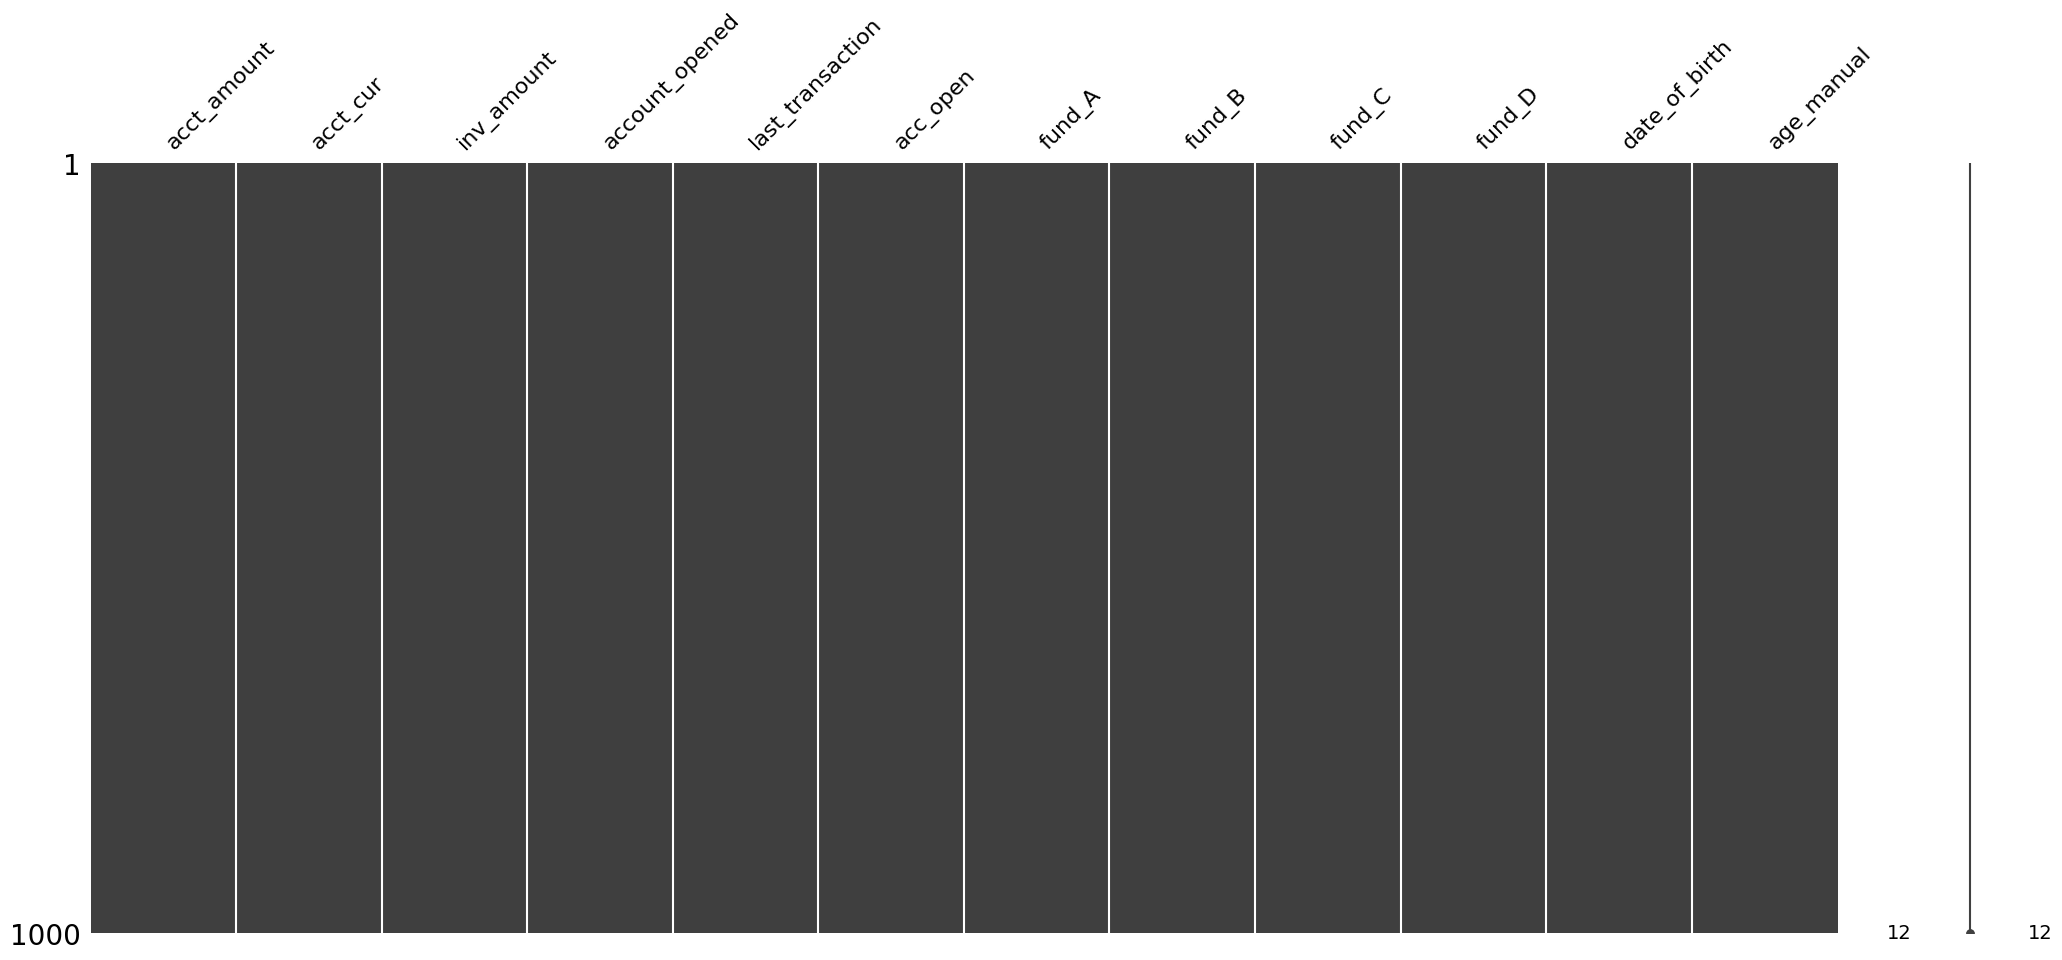

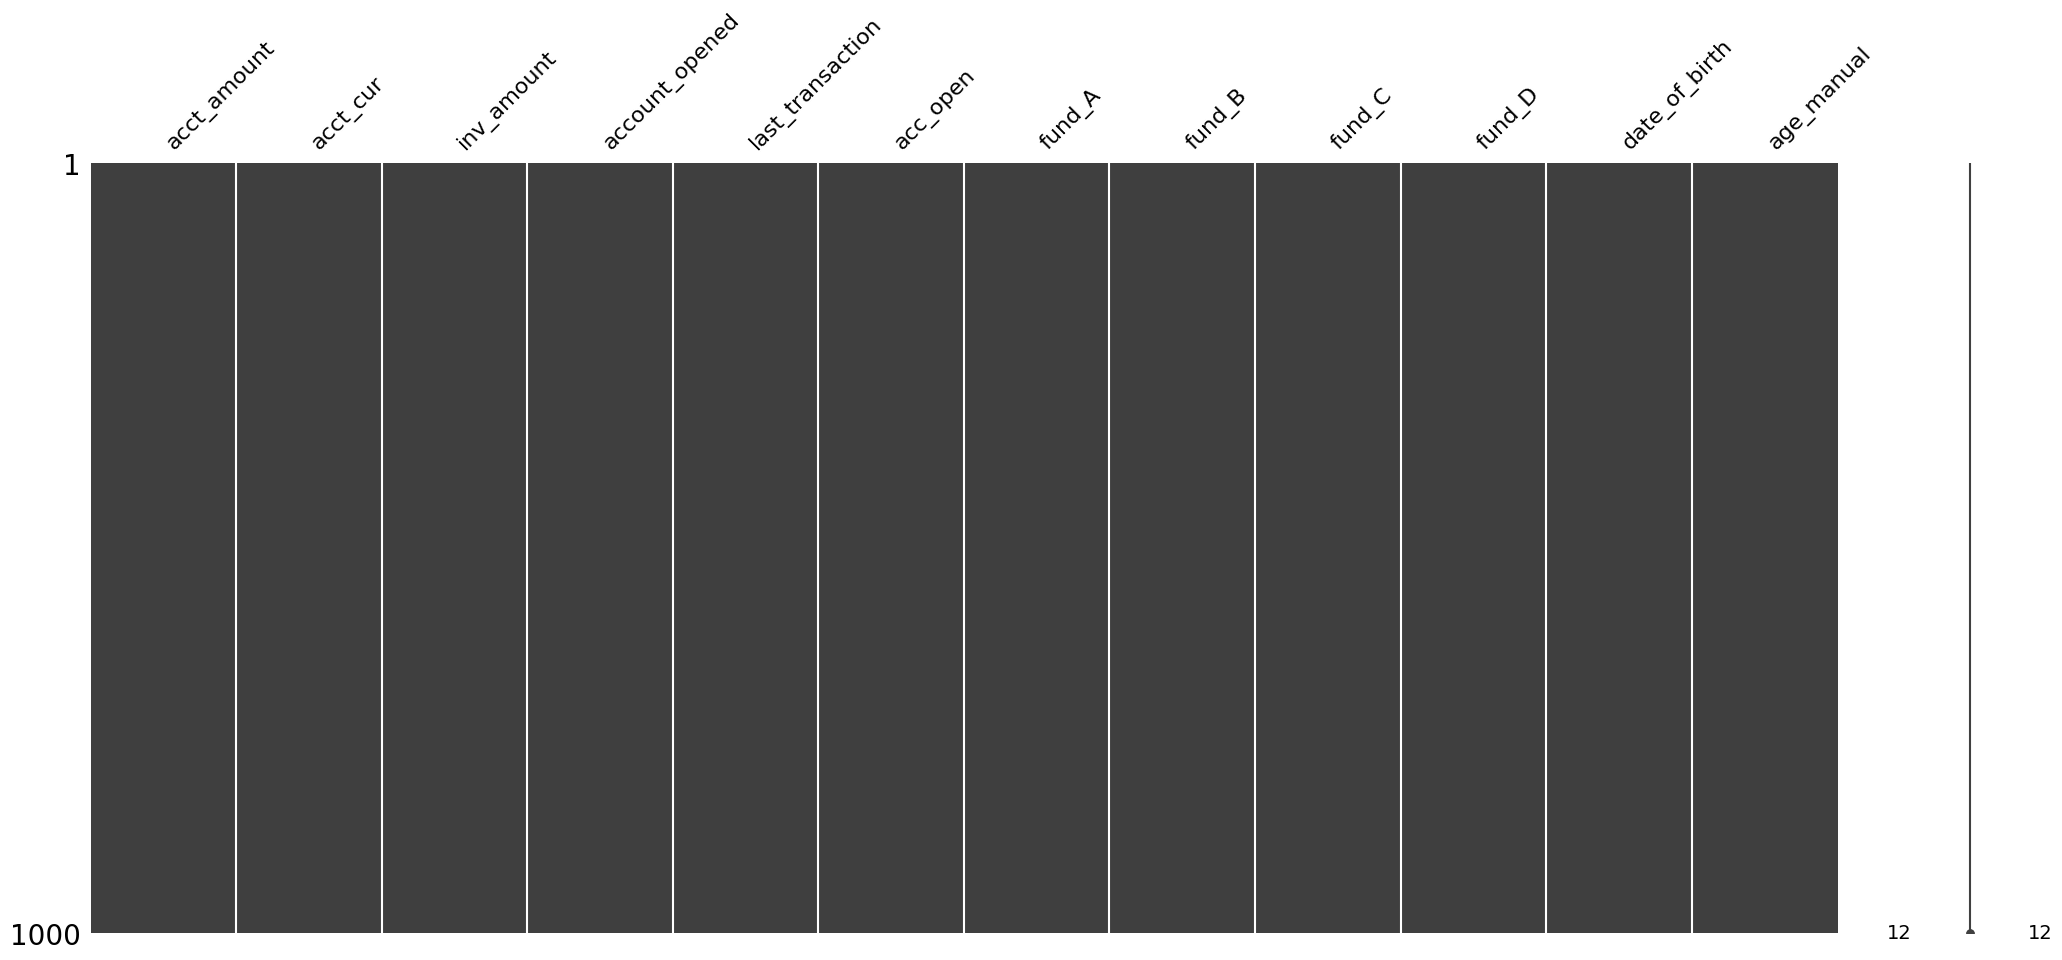

In [19]:
import missingno as msno
import matplotlib.pyplot as plt

# Print number of missing values in banking
print(banking_updated.isna().sum())

# Visualize missingness matrix
msno.matrix(banking_updated)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking_updated[banking_updated['inv_amount'].isna()]
investors = banking_updated[~banking_updated['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking_updated.sort_values(by="age_manual")
msno.matrix(banking_sorted)
plt.show()

**Follow the money**

In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.



* Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
* Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
* Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().


In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

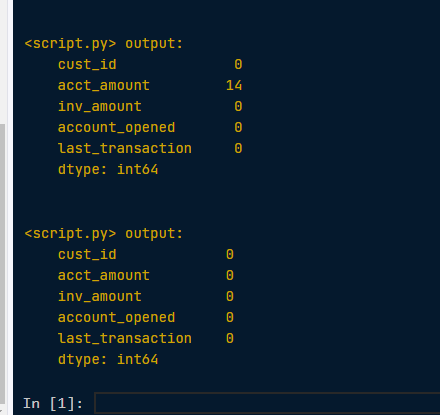